In [1]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")

sorted2midpoints (generic function with 1 method)

C[1,1,n,n]=3


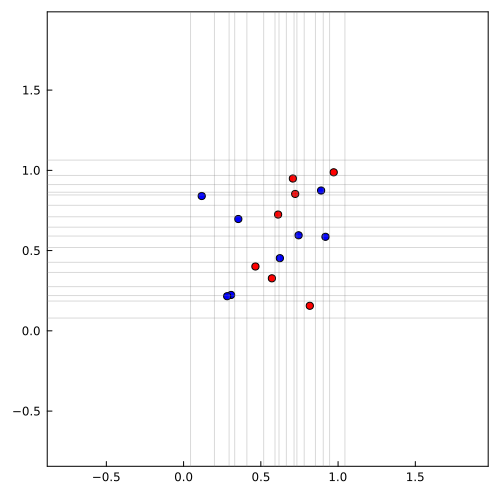

In [25]:
# Data generation ########################################################################
n = 15
S = rand(n,2)
#w = rand([-1,1], n)

half = n ÷ 2
w = shuffle([ones(Int,half)...,-ones(Int,n-half)...])


# Utils ##################################################################################
sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)

Disc_pqij(p,q,i,j) = abs(sum(w[intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])]))
Count_pqij(p,q,i,j) = length(intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1]))

# Initialization #########################################################################
inf = 100
C = 100*ones(Int,n,n,n,n)
P = zeros(Int,n,n,n,n)
D = zeros(Int,n,n,n,n)

# 0 --> not calculated!
# 1 --> Discepancy
# 2 --> Vertical
# 3 --> Horizontal
argcuts = zeros(Int,n,n,n,n)

# 0   --> not calculated! or Discepancy
# 1:n --> midpoint index of v or h cut
idxcuts = zeros(Int,n,n,n,n)

for p = 1:n
    for q = 1:n
        for i = 1:n-p+1
            for j = 1:n-q+1
                P[p,q,i,j] = Count_pqij(p,q,i,j)
                D[p,q,i,j] = Disc_pqij(p,q,i,j)
            end
        end
        if P[p,q,1,1] != 0
            C[p,q,1,1] = D[p,q,1,1]
        end
    end
end

open("test.txt","w") do io
    print_C_pyramid(C, "      Initialization C[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(P, "                     P[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(D, "                     D[p,q,i,j]",io)
end

#print_C_pyramid(C, "      Initialization C[p,q,i,j]")

for i = 1:n
    for j = 1:n
        if i+j>2
            for p = 1:n-i+1
                for q = 1:n-j+1
                    # CREO QUE ESTE IF NO CAMBIA NADA; PERO EVITA HARTO CALCULO TRIVIAL
                    if P[p,q,i,j] != 0
                        
                        # vertical cut
                        if i > 1
                            v_cuts = [[C[p,q,s,j], C[p+s,q,i-s,j]][k] for s=1:i-1, k=1:2]
                            v_argmins = argmin(v_cuts, dims=2)
                            v_mins = v_cuts[v_argmins]
                            v_argmax = argmax(v_mins)
                            v_max = v_mins[v_argmax]
                        else
                            v_max = 0
                        end
                            
                        # horizontal cut
                        if j > 1
                            h_cuts =  [[C[p,q,i,t], C[p,q+t,i,j-t]][k] for t=1:j-1, k=1:2]
                            h_argmins = argmin(h_cuts, dims = 2)
                            h_mins = h_cuts[h_argmins]
                            h_argmax = argmax(h_mins)
                            h_max = h_mins[h_argmax]
                        else
                            h_max = 0
                        end
                        
                        #println("(p,q)=($p,$q) i=$i j=$j")    
                        mini = [D[p,q,i,j], v_max..., h_max...]
                        
                        C[p,q,i,j] = maximum(mini)
                        argcuts[p,q,i,j] = argmax(mini)
                        if argcuts[p,q,i,j] == 2
                            idxcuts[p,q,i,j] = v_argmax[1]
                        elseif argcuts[p,q,i,j] == 3
                            idxcuts[p,q,i,j] = h_argmax[1]
                        end
                            
                    end
                end
            end
        end
    end
end


#print_C_pyramid(argcuts, "                  argcuts[p,q,i,j]")

println("C[1,1,n,n]=$(C[1,1,n,n])")
fig = plot_rb_points(S, w)
plot_add_lines!(fig, S)
fig

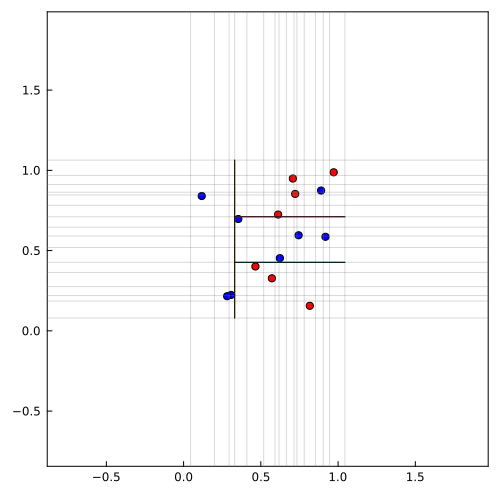

In [27]:

function plot_guillotine_line(k,p,q,i,j,fig)
    k = k+1
    if k<6
        if argcuts[p,q,i,j] == 2
            s = idxcuts[p,q,i,j]
            plot!([midpoints_x[p+s],midpoints_x[p+s]],[midpoints_y[q],midpoints_y[q+j]], color=:black)
            plot_guillotine_line(k,p,q,s,j,fig)
            plot_guillotine_line(k,p+s,q,i-s,j,fig)
        elseif argcuts[p,q,i,j] == 3
            t = idxcuts[p,q,i,j]
            plot!([midpoints_x[p],midpoints_x[p+i]],[midpoints_y[q+t],midpoints_y[q+t]], color=:black)
            plot_guillotine_line(k,p,q,i,t,fig)
            plot_guillotine_line(k,p,q+t,i,j-t,fig)
        end
    end
end

plot_guillotine_line(0,1,1,n,n,fig)
fig

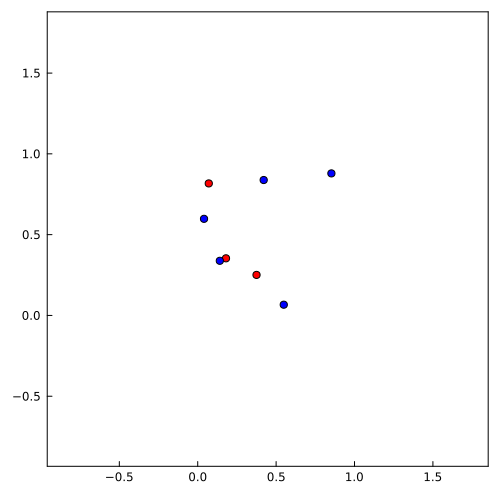

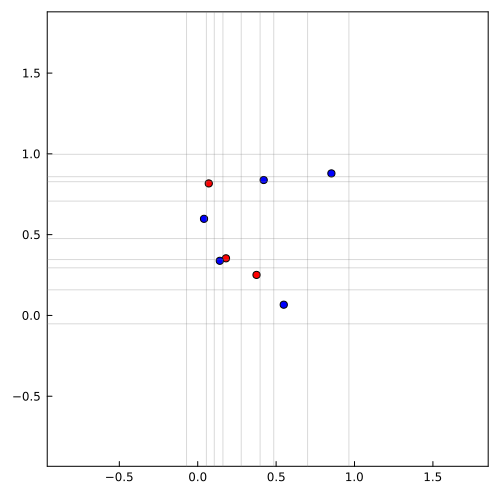

In [6]:
n = 8

S = rand(n,2)
w = rand([-1,1], n)

plt = plot_rb_points(S, w)
display(plt)
plot_add_lines!(plt, S)

In [14]:
#=
sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)
=#
p = 1; q = 2; i = 3; j = 3;

M = Matrix{Any}(undef,n,4); M[:,1] = 1:n; M[:,2:3]= round.(S,digits=2); foo(x) = x==1 ? 'r' : 'b'; M[:,4] = foo.(w) 
display(M)

println("\np = $p, q = $q, i = $i, j = $j\n--------------------------")
print("                      "); for i=1:n+1 print(i,"  ") end; print("  midpoint index\n")
println("sortperm_x          = $sortperm_x")
println("sortperm_x[p:p+i-1] = $(sortperm_x[p:p+i-1])\n")
print("                      "); for i=1:n+1 print(i,"  ") end; print("  midpoint index\n")
println("sortperm_y          = $sortperm_y")
println("sortperm_y[q:q+j-1] = $(sortperm_y[q:q+j-1])\n")


int = intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])
println("intersection = $int\n")

print("     "); for i=1:n print((w[i]==-1 ? " " : ""),i,"  ") end; print("  point index\n")
println("w = $w\n" )
println("Disc_pqij  = abs(sum(w[intersection])) = $(abs(sum(w[int])))")
println("Count_pqij = length(intersection)      = $(length(int))")

plot_rb_points(S, w)
plot_add_lines!(plt, S)
xx = [midpoints_x[p], midpoints_x[p], midpoints_x[p+i], midpoints_x[p+i]]
yy = [midpoints_y[q], midpoints_y[q+j], midpoints_y[q+j], midpoints_y[q]]
plot!(Shape(xx,yy), color=:gray, alpha = .2)

9×4 Matrix{Any}:
 1  0.13  0.49  'b'
 2  0.15  0.07  'b'
 3  0.91  0.61  'b'
 4  0.1   0.61  'r'
 5  0.01  0.94  'r'
 6  0.38  0.11  'b'
 7  0.45  0.2   'b'
 8  0.43  0.92  'r'
 9  0.12  0.4   'r'


p = 1, q = 2, i = 3, j = 3
--------------------------
                      1  2  3  4  5  6  7  8  9  10    midpoint index
sortperm_x          = [5, 4, 9, 1, 2, 6, 8, 7, 3]
sortperm_x[p:p+i-1] = [5, 4, 9]

                      1  2  3  4  5  6  7  8  9  10    midpoint index
sortperm_y          = [2, 6, 7, 9, 1, 3, 4, 8, 5]
sortperm_y[q:q+j-1] = [6, 7, 9]

intersection = [9]

      1   2   3  4  5   6   7  8  9    point index
w = [-1, -1, -1, 1, 1, -1, -1, 1, 1]

Disc_pqij  = abs(sum(w[intersection])) = 1
Count_pqij = length(intersection)      = 1


LoadError: UndefVarError: plt not defined

C[1,1,n,n]=3


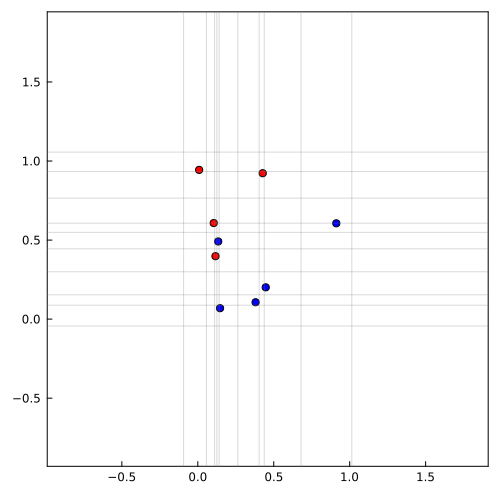

In [3]:
n = 9
S = rand(n,2)
#w = rand([-1,1], n)

half = n ÷ 2
w = shuffle([ones(Int,half)...,-ones(Int,n-half)...])

sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)

Disc_pqij(p,q,i,j) = abs(sum(w[intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])]))
Count_pqij(p,q,i,j) = length(intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1]))

inf = 100
C = 100*ones(Int,n,n,n,n)
P = zeros(Int,n,n,n,n)
D = zeros(Int,n,n,n,n)

# 0 --> not calculated!
# 1 --> Discepancy
# 2 --> Vertical
# 3 --> Horizontal
argcuts = zeros(Int,n,n,n,n)

# 0   --> not calculated!
# 1   --> Discepancy
# 2:n --> midpoint index of v or h cut
idxcuts = zeros(Int,n,n,n,n)

for p = 1:n
    for q = 1:n
        for i = 1:n-p+1
            for j = 1:n-q+1
                P[p,q,i,j] = Count_pqij(p,q,i,j)
                D[p,q,i,j] = Disc_pqij(p,q,i,j)
            end
        end
        if P[p,q,1,1] != 0
            C[p,q,1,1] = D[p,q,1,1]
        end
    end
end

open("test.txt","w") do io
    print_C_pyramid(C, "      Initialization C[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(P, "                     P[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(D, "                     D[p,q,i,j]",io)
end

#print_C_pyramid(C, "      Initialization C[p,q,i,j]")

for i = 1:n
    for j = 1:n
        if i+j>2
            for p = 1:n-i+1
                for q = 1:n-j+1
                    # CREO QUE ESTE IF NO CAMBIA NADA; PERO EVITA HARTO CALCULO TRIVIAL
                    if P[p,q,i,j] != 0
                        
                        # vertical cut
                        if i > 1
                            vcuts = inf * ones(Int64, i-1, 4, 2) 
                            for s = 1:i-1
                                vcuts[s,:,:] = [
                                    C[p,q,s,j] C[p+s,q,i-s,j]
                                    C[p,q,s,j] D[p+s,q,i-s,j]
                                    D[p,q,s,j] C[p+s,q,i-s,j]
                                    D[p,q,s,j] D[p+s,q,i-s,j]
                                ]
                            end

                            vargmins = argmin(vcuts, dims = 3)
                            vmins = vcuts[vargmins]
                            vargmax = argmax(vmins, dims = (1,2))
                            vmax = vcuts[vargmins[vargmax]]
                        else 
                            vmax = 0
                        end
                            
                        # horizontal cut
                        if j > 1
                            hcuts = inf * ones(Int64, j-1, 4, 2) 
                            for t = 1:j-1
                                hcuts[t,:,:] = [
                                        C[p,q,i,t] C[p,q+t,i,j-t]
                                        C[p,q,i,t] D[p,q+t,i,j-t]
                                        D[p,q,i,t] C[p,q+t,i,j-t]
                                        D[p,q,i,t] D[p,q+t,i,j-t]
                                ]
                            end

                            hargmins = argmin(hcuts, dims = 3)
                            hmins = hcuts[hargmins]
                            hargmax = argmax(hmins, dims = (1,2))
                            hmax = hcuts[hargmins[hargmax]]
                        else
                            hmax = 0
                        end
                        
                        #println("(p,q)=($p,$q) i=$i j=$j")    
                        mini = [D[p,q,i,j], vmax..., hmax...]
                        
                        C[p,q,i,j] = maximum(mini)
                        argcuts[p,q,i,j] = argmax(mini)
                        if argcuts[p,q,i,j] == 1
                            idxcuts[p,q,i,j] = 1
                        elseif argcuts[p,q,i,j] == 2 || argcuts[p,q,i,j] == 3
                            idxcuts[p,q,i,j] = vargmins[vargmax][1,1,1][1] + 1
                        end    
                            
                    end
                end
            end
        end
    end
end

open("test.txt","a") do io
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(C, "               Final C[p,q,i,j]",io)
end


#print_C_pyramid(argcuts, "                  argcuts[p,q,i,j]")


p=1
q=1
i=n
j=n



println("C[1,1,n,n]=$(C[1,1,n,n])")
fig = plot_rb_points(S, w)
plot_add_lines!(fig, S)

1199
4
1149
5159


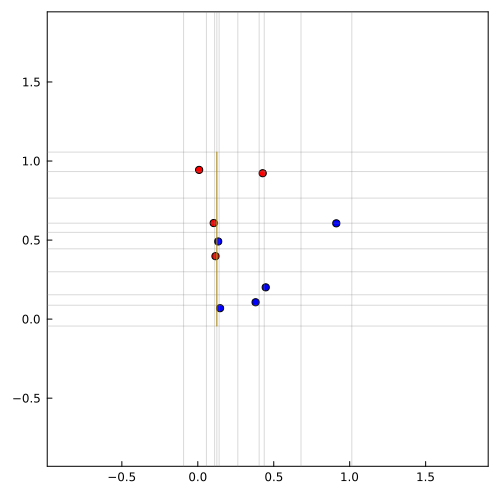

In [12]:
fig = plot_rb_points(S, w)
plot_add_lines!(fig, S)
plot_guillotine_line(fig,p,q,i,j)
fig

In [13]:
print_C_pyramid(C)



 i=1 --------------------------------------------
 j=1                                         □1×1
    q=9    1 100 100 100 100 100 100 100 100
    q=8  100 100 100 100 100 100   1 100 100
    q=7  100   1 100 100 100 100 100 100 100
    q=6  100 100 100 100 100 100 100 100   1
    q=5  100 100 100   1 100 100 100 100 100
    q=4  100 100   1 100 100 100 100 100 100
    q=3  100 100 100 100 100 100 100   1 100
    q=2  100 100 100 100 100   1 100 100 100
    q=1  100 100 100 100   1 100 100 100 100
         p=1 p=2 p=3 p=4 p=5 p=6 p=7 p=8 p=9
 j=2                                         □1×2
    q=8    1 100 100 100 100 100   1 100 100
    q=7  100   1 100 100 100 100   1 100 100
    q=6  100   1 100 100 100 100 100 100   1
    q=5  100 100 100   1 100 100 100 100   1
    q=4  100 100   1   1 100 100 100 100 100
    q=3  100 100   1 100 100 100 100   1 100
    q=2  100 100 100 100 100   1 100   1 100
    q=1  100 100 100 100   1   1 100 100 100
         p=1 p=2 p=3 p=4 p=5 p=6 p=7 p

In [10]:

function plot_guillotine_line(fig,p,q,i,j)
    if argcuts[p,q,i,j] == 2
        s = idxcuts[p,q,i,j]
        plot!([midpoints_x[s],midpoints_x[s]],[midpoints_y[q],midpoints_y[q+j]])
        println(p,q,i,j)
        println(s)
        println(p,q,s,j)
        println(p+s,q,i-s,j)
        plot_guillotine_line(fig,p,q,s,j)
        plot_guillotine_line(fig,p+s,q,i-s,j)
    elseif argcuts[p,q,i,j] == 3
        t = idxcuts[p,q,i,j]
        plot!([midpoints_x[p],midpoints_x[p+i]],[midpoints_y[t],midpoints_y[t]])
        plot_guillotine_line(fig,p,q,i,t)
        plot_guillotine_line(fig,p,q+t,i,j-t)
    end
end

plot_guillotine_line (generic function with 1 method)